# 데이터 전처리 실습

- 타이타닉 생존자 예측 문제 데이터의 전처리

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.36.15.png?raw=1" width=400 align='left'>

# import

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 맥에서 레티나 디스플레이 사용 설정
%config InlineBackend.figure_format = 'retina'

# 데이터
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [77]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(data.shape)
data[:3]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



## 데이터 전처리

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링

## 데이터 기본 정보
- info()를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
  - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다
  - 아래에서 Pclass는 선실 등급을 나타내는 카테고리 변수이다

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 결측치 처리

- 결측치를 처리하는 방법은 크게 세 가지가 있다
  - 결측치가 포함된 샘플(행)을 버린다
  - 결측치를 적절한 값으로 대체한다
  - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
- 특정 컬럼에 결측치가 너무 많은 경우 컬럼 자체를 사용하지 않는 방법도 있다
  - 샘플(행) 삭제를 하기 전에 컬럼 삭제를 먼저 고려해야 한다


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-06%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.01.24.png?raw=1" width=320 align='left'>

## 컬럼별 결측치 수 확인

In [79]:
# 사본 사용
df = data.copy()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 컬럼 미사용

### Cabin(객실명)
- Cabin은 객실명으로, 의미있는 정보가 아니고, 결측치가 많고(687개), 종류가 다양하므로(147종류) 컬럼 자체를 사용하지 않기로 한다

In [80]:
print("Cabin 종류:", df.Cabin.nunique())
df.Cabin.value_counts()[:5]

Cabin 종류: 147


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

### Ticket(티켓명)
- 681 종류나 되며 분석에 큰 의미가 없는 것으로 보인다. 분석에 사용하지 않는다. 즉, 컬럼 삭제를 하겠다

In [81]:
## Ticket 보기

print("Ticket 종류:", df.Ticket.nunique())
df.Ticket.value_counts()[:5]

Ticket 종류: 681


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

### PassengerId, Name

- 일렬번호와 이름은 분석에 의미가 없으므로 사용하지 않는다

In [82]:
## 사용하지 않을 컬럼 4개를 삭제한 데이터프레임을 만든다

df = df[df.columns.difference(['PassengerId','Name','Ticket','Cabin'])]
df[:5]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0
1,38.0,C,71.2833,0,1,female,1,1
2,26.0,S,7.9250,0,3,female,0,1
3,35.0,S,53.1000,0,1,female,1,1
4,35.0,S,8.0500,0,3,male,0,0


## 결측치 대체

### 나이

- Age(나이)는 결측치가 많으나, 의미 있는 정보이므로 삭제하지 않고 다른 값으로 대체한다 (평균치 사용)

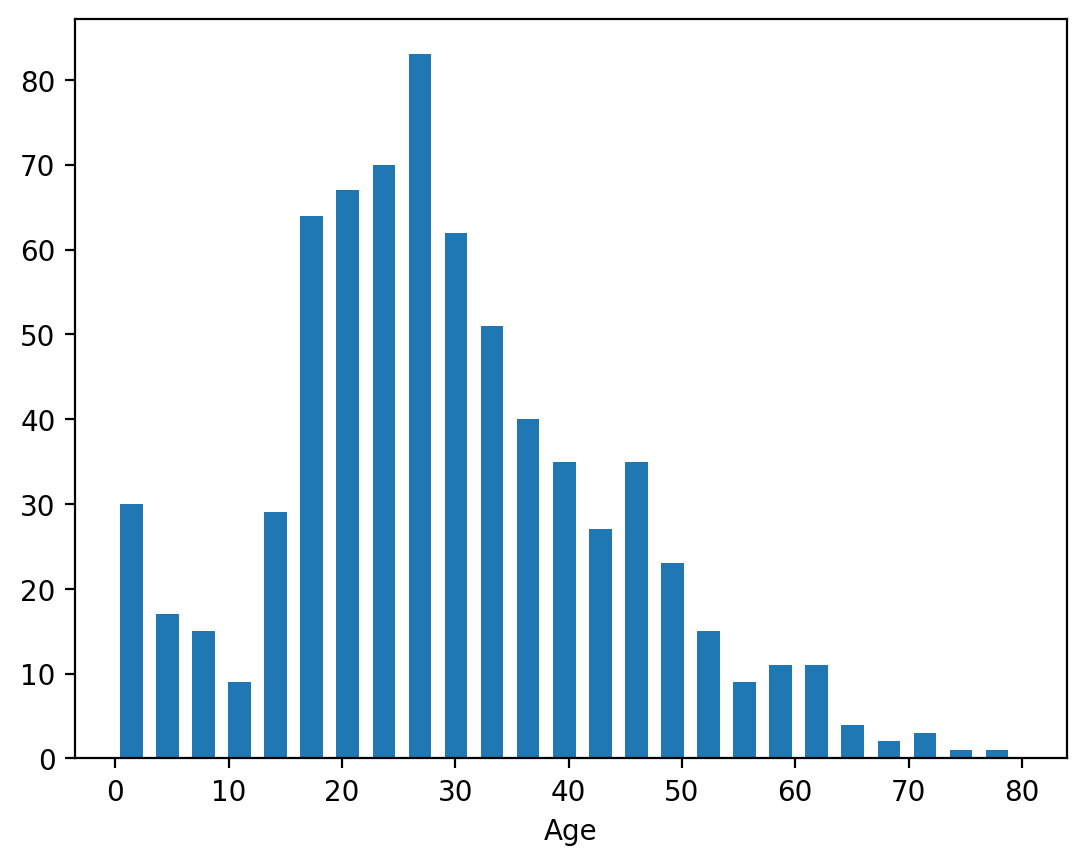

In [83]:
## Age (나이) 분포 보기

plt.hist(df.Age, bins=25, width=2)
plt.xlabel('Age')
plt.show()

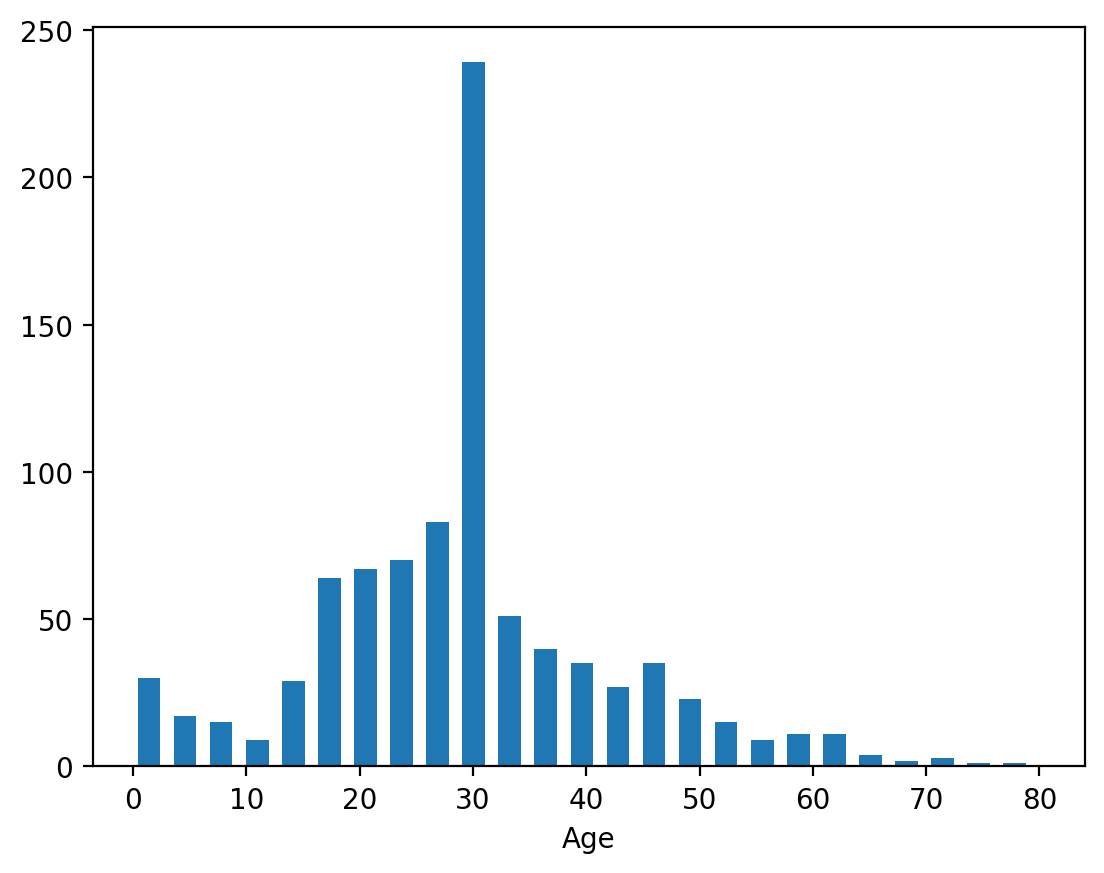

In [84]:
## 결측치를 평균 나이로 대체 (대체한 것을 즉시 반영했다)

df.Age.fillna(df.Age.mean(), inplace=True)
plt.hist(df.Age, bins=25, width=2)
plt.xlabel('Age')
plt.show()

### 항구명
- 항구 데이터(Embarked)는 결측치가 2개 뿐이고 다른 값으로 대체하기가 어려우므로 샘플을 삭제한다

In [85]:
## Embarked (항구명) 결측치가 있는 두 샘플은 삭제한다

print(df.shape)
df = df[~df["Embarked"].isnull()]
print(df.shape)

(891, 8)
(889, 8)


# 데이터 변환
- 카테고리 변수와 아나로그 변수로 나누어 처리한다
- 카테고리 변수는 일반적으로 원핫 인코딩으로 표현한다
- 아나로그 변수는 로그변환, 역수변환 등을 하거나 카테고리 변수로 변환하기도 한다

## 카테고리 변수

- 원핫(one-hot) 인코딩으로 변환한다
- get_dummies() 사용

### 선실 등급
- 숫자로 표현되어 있으나 카테고리를 나타낸다 (3가지 등급)

In [87]:
# 선실 등급은 3가지 등급을 나타내는 카테고리 변수임
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

### 성별
- 성별도 카테고리 변수이며 원핫 인코딩으로 변환한다

In [88]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

### 항구명
- 세가지 항구명도 카테고리 변수이며 원핫 인코딩으로 변환한다

In [89]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
## 선실등급, 성별, 항구명을 원핫 인코딩한다

df = pd.get_dummies(df, columns=['Pclass','Sex','Embarked'])
df[:5]

,Age,Fare,Parch,SibSp,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,0,0,0,1,0,1,0,0,1
1,38.0,71.2833,0,1,1,1,0,0,1,0,1,0,0
2,26.0,7.9250,0,0,1,0,0,1,1,0,0,0,1
3,35.0,53.1000,0,1,1,1,0,0,1,0,0,0,1
4,35.0,8.0500,0,0,0,0,0,1,0,1,0,0,1


## 연속형 변수

### 요금

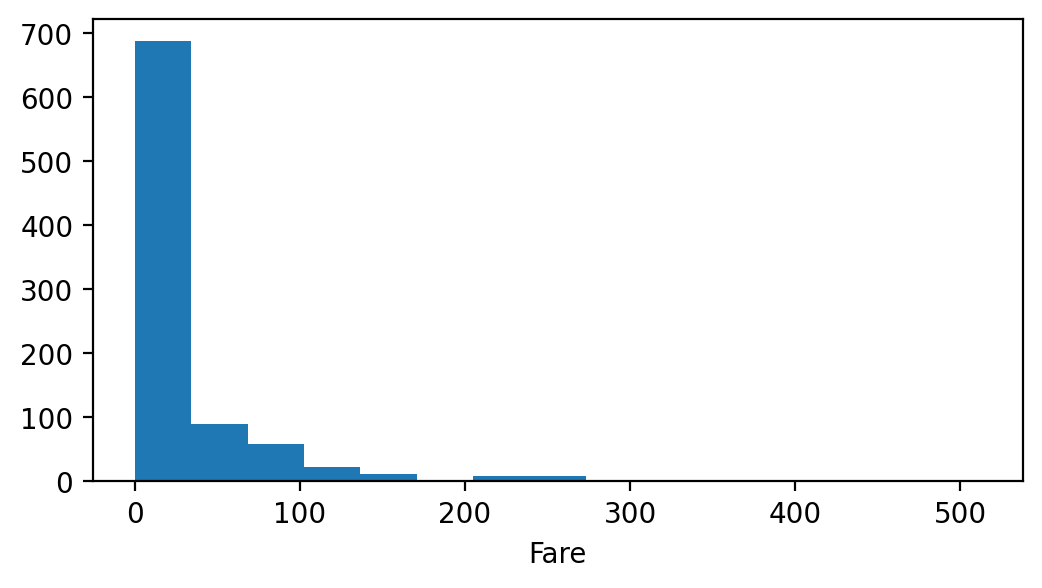

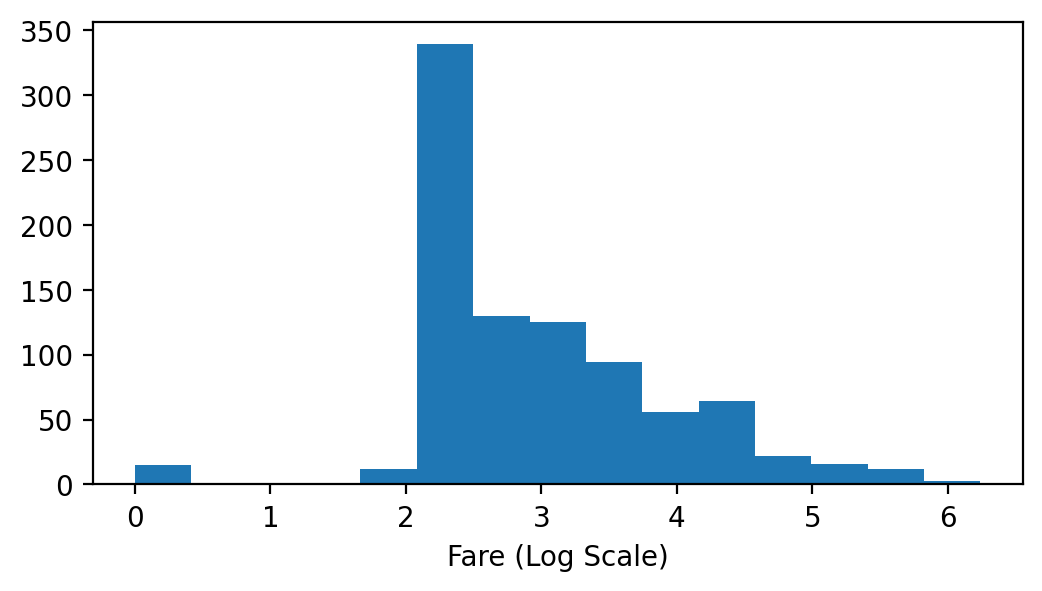

In [91]:
## 돈과 관련된 데이터는 로그를 취하면 정규 분포처럼 보인다

plt.figure(figsize=(6,3))
plt.hist(df.Fare, bins=15)
plt.xlabel('Fare')
plt.show()
plt.figure(figsize=(6,3))
plt.hist(np.log(df.Fare+1), bins=15)
plt.xlabel('Fare (Log Scale)')
plt.show()

In [92]:
## 요금(Fare)은 로그를 취한 값을 사용한다

df["Fare"] = np.log(df.Fare +1)
df[:5]

,Age,Fare,Parch,SibSp,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,2.110213,0,1,0,0,0,1,0,1,0,0,1
1,38.0,4.280593,0,1,1,1,0,0,1,0,1,0,0
2,26.0,2.188856,0,0,1,0,0,1,1,0,0,0,1
3,35.0,3.990834,0,1,1,1,0,0,1,0,0,0,1
4,35.0,2.202765,0,0,0,0,0,1,0,1,0,0,1


### 기타 변수
- 형제/동반자(sibling/spouse), 부모/자녀(parent/child) 수는 그대로 사용한다
- 즉, 별도의 변환은 하지 않는다

<Axes: >

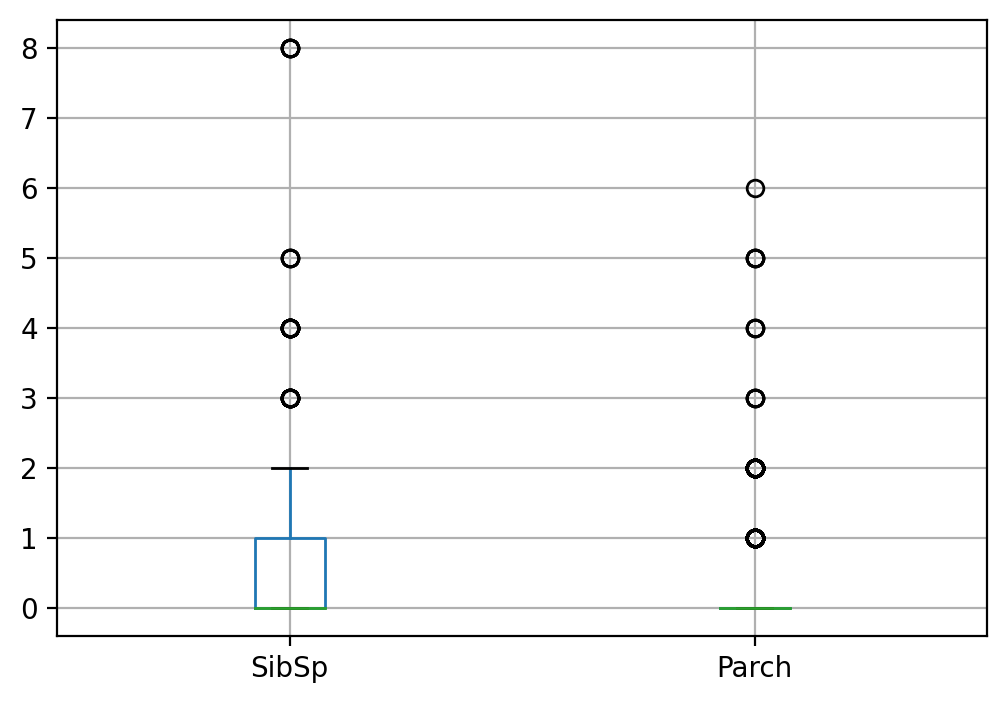

In [96]:
## 박스 플롯으로 데이터의 전체적인 값의 범위를 파악할 수 있다
## 'Pclass','SibSp','Parch' 의 범위 보기

plt.figure(figsize=(6,4))
df[['SibSp','Parch']].boxplot()

### 스케일링
- 일반적으로 연속형, 아나로그 값은 스케일링을 하는 것이 안전하다
- 결정트리, 랜덤 포레스트 등 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만 선형모델, 신경망 모델 등에서 스케일링을 해야 한다
- 기본적으로는 표준 스케일링을 하며, 최대값과 최소값의 범위가 분명히 한정되어 있을 때는 min-max 스케일링도 사용한다

In [97]:
## 연속형 변수에 표준 스케일링을 적용한다

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare','SibSp','Parch']] = scaler.fit_transform(df[['Age','Fare','SibSp','Parch']])
df[:5]

,Age,Fare,Parch,SibSp,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.590495,-0.877591,-0.474326,0.431350,0,0,0,1,0,1,0,0,1
1,0.643971,1.366380,-0.474326,0.431350,1,1,0,0,1,0,1,0,0
2,-0.281878,-0.796281,-0.474326,-0.475199,1,0,0,1,1,0,0,0,1
3,0.412509,1.066796,-0.474326,0.431350,1,1,0,0,1,0,0,0,1
4,0.412509,-0.781901,-0.474326,-0.475199,0,0,0,1,0,1,0,0,1


# 데이터분석에 사용할 X와 y

In [102]:
## 데이터분석에 사용할 X와 y 얻기
# 목적 변수는 생존여부를 나타내는 Survived이다 (0:사망, 1:생존)

X = df[df.columns.difference(['Survived'])]
y = df.Survived
print(X.shape)
X[:5]

(889, 12)


,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp
0,-0.590495,0,0,1,-0.877591,-0.474326,0,0,1,0,1,0.431350
1,0.643971,1,0,0,1.366380,-0.474326,1,0,0,1,0,0.431350
2,-0.281878,0,0,1,-0.796281,-0.474326,0,0,1,1,0,-0.475199
3,0.412509,0,0,1,1.066796,-0.474326,1,0,0,1,0,0.431350
4,0.412509,0,0,1,-0.781901,-0.474326,0,0,1,0,1,-0.475199


In [101]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# (실습) 전처리
-항구명이 없는 샘플을 삭제하지 말고, 가장 빈도수가 높은 항구명으로 대체하시오